<a href="https://colab.research.google.com/github/Atolwa/Sentiment-Analysis-of-Kenyan-Political-Tweets/blob/main/TSAPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#SENTIMENT ANALYSIS OF POLITICAL TWEETS

In [2]:
!pip install nltk
!pip install flask-ngrok

In [3]:
#Import the libraries
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import nltk
nltk.download('all')
import warnings
%matplotlib inline
import string
from flask_ngrok import run_with_ngrok
from flask import Flask,request,render_template
import pickle

warnings.filterwarnings('ignore')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [4]:
#get the data
df = pd.read_csv(r'/content/drive/MyDrive/kenya_political_tweets.csv')

test = pd.read_excel(r'/content/drive/MyDrive/KPTs.xlsx')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1396091006030856192,Doomster,Utopia slums,"Alt-left, liberal, pronoun:them",2009-08-23 12:22:53,309,907,8050,False,2021-05-22 13:10:08,@PrettyAmmina The change to the new blue unifo...,NaN,Twitter Web App,0.0,0.0,False
1,1395981137764397056,Unruly 🗯,Morayfield,I don't know what you thought this was gonna b...,2011-04-20 19:35:54,1053,523,5279,False,2021-05-22 05:53:33,I think it's now safe to say President Uhuru K...,NaN,Twitter for Android,0.0,0.0,False
2,1395433210490798082,Khavin,Nairobi,CCTV installation and MAINTENANCE technician. ...,2020-02-11 04:52:44,4202,3735,29563,False,2021-05-20 17:36:17,@_CrazyKenyan President Uhuru Kenyatta bribed ...,['bbinonsense'],Twitter Web App,0.0,1.0,False
3,1394739630898044931,Lecturer🇰🇪💥,Eldoret,President Kenyatta's critic.William Samoei Rut...,2020-01-23 19:10:51,774,1467,4150,False,2021-05-18 19:40:15,"As @HonMoses_Kuria has just been saying,Presid...",NaN,Twitter for Android,0.0,0.0,False
4,1394561455471661057,Lecturer🇰🇪💥,Eldoret,President Kenyatta's critic.William Samoei Rut...,2020-01-23 19:10:51,774,1467,4150,False,2021-05-18 07:52:15,David Murathe the KEMSA thief and President Uh...,NaN,Twitter for Android,2.0,1.0,False


In [5]:
#Create a dataframe with a column called tweets
tweetsDF=pd.DataFrame([df for df in df.text] , columns=['tweet'])
tweetsDF.head()

,tweet
0,@PrettyAmmina The change to the new blue unifo...
1,I think it's now safe to say President Uhuru K...
2,@_CrazyKenyan President Uhuru Kenyatta bribed ...
3,"As @HonMoses_Kuria has just been saying,Presid..."
4,David Murathe the KEMSA thief and President Uh...


In [6]:
#Clean the text
#Create Function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '',str(text))#removes usernames
  text = re.sub(r'#w*','',text)#remove the #s
  text = re.sub(r'RT[\s]+','',text)#remove RT
  text = re.sub(r'https?:\/\/\S+','',text)#remove hyper link
  text = re.sub(r'@\w*\s?','',text) #remove usernames
  text = re.sub(r'[^\x00-\x7F]+','',text)#remove non utf8 characters
  


  return text

#Apply Function
tweetsDF['tweet'] = tweetsDF['tweet'].apply(cleanTxt)

#Show cleaned text
tweetsDF


,tweet
0,The change to the new blue uniforms was order...
1,I think it's now safe to say President Uhuru K...
2,"President Uhuru Kenyatta bribed MCAs, Mpigs an..."
3,"As _Kuria has just been saying,President Uhuru..."
4,David Murathe the KEMSA thief and President Uh...
...,...
11718,Preparations are in top gear for the coronatio...
11719,"""I managed to kick William Ruto out of Jubilee..."
11720,If William Ruto and Uhuru Kenyatta could not m...
11721,DP William Ruto has criticized proponents of B...


In [7]:
tweetsDF['tweet'] = tweetsDF['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))#remove short words
tweetsDF

,tweet
0,change blue uniforms ordered President Uhuru K...
1,think it's safe President Uhuru Kenyatta amepa...
2,"President Uhuru Kenyatta bribed MCAs, Mpigs se..."
3,"_Kuria just been saying,President Uhuru Kenyat..."
4,David Murathe KEMSA thief President Uhuru Keny...
...,...
11718,Preparations gear coronation Deputy President ...
11719,managed kick William Ruto Jubilee Murathe. wor...
11720,William Ruto Uhuru Kenyatta could maintain sim...
11721,William Ruto criticized proponents pursuing co...


TEXT NORMALIZATION

In [8]:
#individual words considered as tokens
tokenized_tweet=tweetsDF['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [change, blue, uniforms, ordered, President, U...
1    [think, it's, safe, President, Uhuru, Kenyatta...
2    [President, Uhuru, Kenyatta, bribed, MCAs,, Mp...
3    [_Kuria, just, been, saying,President, Uhuru, ...
4    [David, Murathe, KEMSA, thief, President, Uhur...
Name: tweet, dtype: object

In [9]:
#stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet= tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [chang, blue, uniform, order, presid, uhuru, k...
1    [think, it', safe, presid, uhuru, kenyatta, am...
2    [presid, uhuru, kenyatta, bribe, mcas,, mpig, ...
3    [_kuria, just, been, saying,presid, uhuru, ken...
4    [david, murath, kemsa, thief, presid, uhuru, k...
Name: tweet, dtype: object

In [10]:
#combine words to single sentence
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i]=' '.join(tokenized_tweet[i])

tweetsDF['tweet']= tokenized_tweet
tweetsDF.head()

,tweet
0,chang blue uniform order presid uhuru kenyatta...
1,think it' safe presid uhuru kenyatta amepatia ...
2,"presid uhuru kenyatta bribe mcas, mpig senat y..."
3,"_kuria just been saying,presid uhuru kenyatta ..."
4,david murath kemsa thief presid uhuru kenyatta...


In [11]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment. polarity

#Create two new columns
tweetsDF['Subjectivity'] =tweetsDF['tweet'].apply(getSubjectivity)
tweetsDF['Polarity'] =tweetsDF['tweet'].apply(getPolarity)


#show the new datframe with the new columns
tweetsDF

,tweet,Subjectivity,Polarity
0,chang blue uniform order presid uhuru kenyatta...,0.1,0.0
1,think it' safe presid uhuru kenyatta amepatia ...,0.5,0.5
2,"presid uhuru kenyatta bribe mcas, mpig senat y...",0.0,0.0
3,"_kuria just been saying,presid uhuru kenyatta ...",0.0,0.0
4,david murath kemsa thief presid uhuru kenyatta...,0.0,0.0
...,...,...,...
11718,prepar gear coron deputi presid william ruto r...,0.0,0.0
11719,manag kick william ruto jubile murathe. word h...,0.0,0.0
11720,william ruto uhuru kenyatta could maintain sim...,0.0,0.0
11721,william ruto critic propon pursu constitut ame...,0.0,0.0


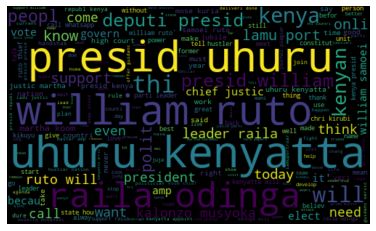

In [12]:
#Word Cloud
allWords = ' '.join([twts for twts in tweetsDF['tweet'] ])
wordCloud = WordCloud(width = 500, height = 300, random_state =21, max_font_size =119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [13]:
#Create a function to compute the negative, positive and neutral analysis
def getAnalysis(score):
  if score <0:
    return 'neg'
  
  else:
    return 'pos'
tweetsDF['Analysis'] = tweetsDF['Polarity'].apply(getAnalysis)
#show dataframe
tweetsDF
        

,tweet,Subjectivity,Polarity,Analysis
0,chang blue uniform order presid uhuru kenyatta...,0.1,0.0,pos
1,think it' safe presid uhuru kenyatta amepatia ...,0.5,0.5,pos
2,"presid uhuru kenyatta bribe mcas, mpig senat y...",0.0,0.0,pos
3,"_kuria just been saying,presid uhuru kenyatta ...",0.0,0.0,pos
4,david murath kemsa thief presid uhuru kenyatta...,0.0,0.0,pos
...,...,...,...,...
11718,prepar gear coron deputi presid william ruto r...,0.0,0.0,pos
11719,manag kick william ruto jubile murathe. word h...,0.0,0.0,pos
11720,william ruto uhuru kenyatta could maintain sim...,0.0,0.0,pos
11721,william ruto critic propon pursu constitut ame...,0.0,0.0,pos


In [14]:
tweetsDF.to_csv(r'/content/drive/MyDrive/kenya political tweets.csv', index = False)

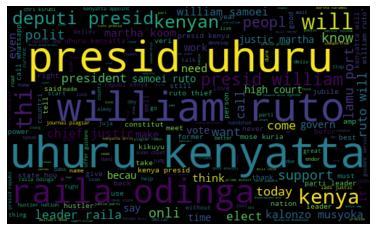

In [15]:
#Word Cloud for Positive tweet
allWords = ' '.join([twts for twts in tweetsDF['tweet'] [tweetsDF['Analysis']=='pos']])
wordCloud = WordCloud(width = 500, height = 300, random_state =21, max_font_size =119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()


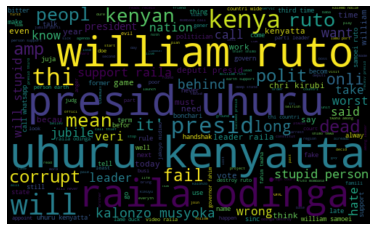

In [16]:
#Word Cloud for negative tweets
allWords = ' '.join([twts for twts in tweetsDF['tweet'] [tweetsDF['Analysis']=='neg']])
wordCloud = WordCloud(width = 500, height = 300, random_state =21, max_font_size =119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [17]:
#Print all of the positive tweets
j=1
sortedDF=tweetsDF.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== 'pos'):
    print(str(j)+')'+sortedDF['tweet'][i])
    print()
    j= j+1

Streaming output truncated to the last 5000 lines.
7843)kenya region creat jubile parti raila odinga' polit career stop icc. that

7844)leader central kenya mihr thakar finish raila odinga polit after warn staunch support

7845)parti leader raila odinga say keen work with wiper parti kalonzo musyoka ensur kenya get

7846)parti leader raila odinga say keen work with wiper parti kalonzo musyoka ensur kenya get right leader 2022.

7847)parti leader raila odinga say keen work with wiper parti kalonzo musyoka ensur kenya get

7848)raila odinga: regga hasn't stopped, soon will resum with bang!

7849)former raila odinga reaffirm commit work onc again with wiper leader stephen kalonzo musyoka

7850)leader raila odinga tell former willi mutunga that moral author lectur kenyan ind

7851)tangatanga when they without mention raila odinga

7852)willi mutunga himself broke when reject evid 2013,... right write letter

7853)raila odinga traiter, oppos presid act judiciary, raila

7854)thought tuliamb

In [18]:
#print the negative tweets
j=1
sortedDF=tweetsDF.sort_values(by=['Polarity'],ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== 'neg'):
    print(str(j)+')'+sortedDF['tweet'][i])
    print()
    j= j+1

1)leader urg resid central region econom bloc (cereb) stay unit behind excel presid

2)abov emin impeach after presid fail chapter 6,that took oath protect,thi

3)which kenyan cannot appreci presid uhuru kenyatta' mileston achiev still!? blind

4)presid muse bihii uhuru kenyatta join other foreign leader djibouti presidentialinauguration.

5)presid republ somaliland presid uhuru kenyatta kenya join with other africa

6)gazzett alien from be uhuru kenyatta person uhuru kenyatta presid

7)presid uhuru kenyatta mean business. it' time work polit uhurukwaground

8)thi _odinga raila junior mess your 2017 presidenti campaigns.

9)uhuru chronicles. 1.ruto betrayed. 2.raila play betrayed. 3.handshake/bbi dead. 4.ruto presid

10)trade divis (otd) behind that statement joho. close bell could ascertain much

11)orengo otiend go defend someth they know deep down unconstitutional. raila odinga' cow thi ones.

12)luhya nation will alway vote raila odinga. musalia mudavadi small mulemb nation. wonder

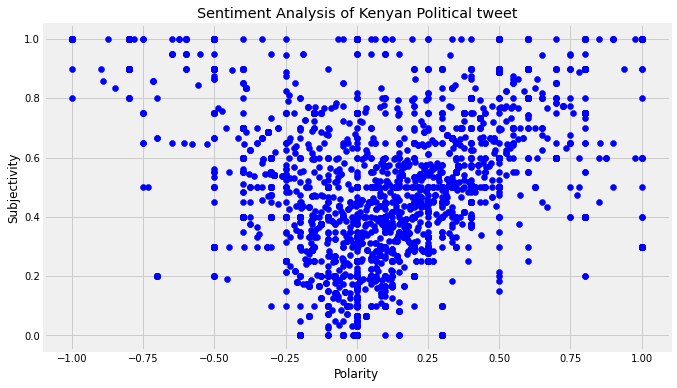

In [19]:
#plot the polarity and subjectivity
plt.figure(figsize=(10,6))
for i in range(0,tweetsDF.shape[0]):
  plt.scatter(tweetsDF['Polarity'][i],tweetsDF['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis of Kenyan Political tweet')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [20]:
#get the percentage positive tweets
ptweets=tweetsDF[tweetsDF.Analysis=='pos']
ptweets = ptweets['tweet']
round( (ptweets.shape[0] / tweetsDF.shape[0])*100, 1)

88.2

In [21]:
#get the percentage negative tweets
ntweets=tweetsDF[tweetsDF.Analysis=='neg']
ntweets = ntweets['tweet']
round( (ntweets.shape[0] / tweetsDF.shape[0])*100, 1)

11.8

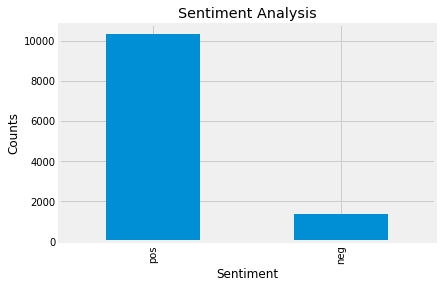

In [22]:
#show value counts
tweetsDF['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweetsDF['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [23]:
tweetsDF.head()


,tweet,Subjectivity,Polarity,Analysis
0,chang blue uniform order presid uhuru kenyatta...,0.1,0.0,pos
1,think it' safe presid uhuru kenyatta amepatia ...,0.5,0.5,pos
2,"presid uhuru kenyatta bribe mcas, mpig senat y...",0.0,0.0,pos
3,"_kuria just been saying,presid uhuru kenyatta ...",0.0,0.0,pos
4,david murath kemsa thief presid uhuru kenyatta...,0.0,0.0,pos


In [24]:
tweetsDF['Sentiment'] = tweetsDF['Analysis'].apply(lambda x: 1 if x=='neg' else 0)
tweetsDF.head()

,tweet,Subjectivity,Polarity,Analysis,Sentiment
0,chang blue uniform order presid uhuru kenyatta...,0.1,0.0,pos,0
1,think it' safe presid uhuru kenyatta amepatia ...,0.5,0.5,pos,0
2,"presid uhuru kenyatta bribe mcas, mpig senat y...",0.0,0.0,pos,0
3,"_kuria just been saying,presid uhuru kenyatta ...",0.0,0.0,pos,0
4,david murath kemsa thief presid uhuru kenyatta...,0.0,0.0,pos,0


In [25]:
x = tweetsDF['tweet']
y = tweetsDF['Sentiment']

In [26]:



#Word Frequencies with tfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# list of documents
docs = tweetsDF['tweet']
# create the transform
vectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
# tokenize and build vocab
#vectorizer.fit(docs)
tfidf_wm = vectorizer.fit_transform(docs)

tfidf_tokens = vectorizer.get_feature_names()
# summarize
print('vocabulary: ', vectorizer.vocabulary_)
print('idfs: ', vectorizer.idf_)
# encode document
vector = vectorizer.transform([docs[0]])
# summarize encoded vector
print('vectors: ', vector.toarray())


vocabulary:  {'chang': 2305, 'blue': 1894, 'uniform': 10910, 'order': 7742, 'presid': 8268, 'uhuru': 10778, 'kenyatta': 5797, 'septemb': 9373, '2019': 296, 'think': 10438, 'safe': 9143, 'amepatia': 1178, 'justic': 5647, 'martha': 6602, 'koom': 5992, 'bribe': 2019, 'mcas': 6697, 'mpig': 7031, 'senat': 9348, 'crucifi': 2951, 'ruto': 9099, 'sin': 9614, 'differ': 3308, 'bbinonsens': 1693, '_kuria': 719, 'just': 5645, 'saying': 9233, 'finish': 4170, 'ago': 1013, 'kenya': 5784, 'kingpin': 5901, 'david': 3042, 'murath': 7117, 'kemsa': 5776, 'thief': 10429, 'advisor': 959, 'togeth': 10534, 'rafael': 8539, 'tuju': 10693, 'readi': 8601, 'kenyan': 5788, 'despit': 3238, 'sever': 9408, 'elit': 3706, 'lack': 6089, 'consist': 2719, 'come': 2575, 'matter': 6663, 'hand': 4734, 'th': 10380, 'propo': 8391, 'somebodi': 9768, 'tell': 10338, 'peter': 8014, 'munya': 7108, 'befor': 1734, '2022': 301, 'pr': 8227, 'recogn': 8658, 'excellency': 3930, 'court': 2877, 'president': 8273, 'leader': 6182, 'urg': 11021

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state=1)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
from sklearn import svm
#params = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100]}
svcl = svm.SVC(kernel = 'rbf')
#clf_sv = GridSearchCV(svcl, params)
svcl.fit(X_train_vec, y_train)
svcl_score = svcl.score(X_test_vec, y_test)
print("Results for Support Vector Machine with tfidf")
print(svcl_score)
y_pred_sv = svcl.predict(X_test_vec)




Results for Support Vector Machine with tfidf
0.9192493602502132


In [28]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm_sv = confusion_matrix(y_test, y_pred_sv)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sv).ravel()
print("True Negative:",tn)
print('False Positive:',fp)
print('False Negative:',fn)
print('True Positive:',tp)

True Negative: 3087
False Positive: 15
False Negative: 269
True Positive: 146


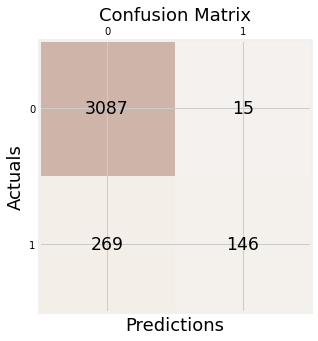

In [29]:
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_sv, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm_sv.shape[0]):
    for j in range(cm_sv.shape[1]):
        ax.text(x=j, y=i,s=cm_sv[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [30]:
tpr_sv = round(tp/(tp + fn), 4)
tnr_sv = round(tn/(tn+fp), 4)
print(tpr_sv, tpr_sv)
print("True Positive Rate:",tpr_sv)
print('True Negative Rate:',tpr_sv)

0.3518 0.3518
True Positive Rate: 0.3518
True Negative Rate: 0.3518


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred_sv))
print('Recall: %.3f' % recall_score(y_test, y_pred_sv))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_sv))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_sv))


Precision: 0.907
Recall: 0.352
F1 Score: 0.507
Accuracy: 0.919


In [32]:
tweet = "Very proud of Ruto our president 2022"
tweet_vec = vectorizer.transform([tweet])
print(svcl.predict(tweet_vec))

[0]


In [33]:
tweet = "I hate Kenyan Politics."
tweet_vec = vectorizer.transform([tweet])
print(svcl.predict(tweet_vec))

[1]


In [34]:
tweet = "The Kenyan government is very corrupt"
tweet_vec = vectorizer.transform([tweet])
print(svcl.predict(tweet_vec))

[1]


PICKLING THE MODEL

In [36]:
import pickle
pickle.dump(svcl, open('svm_model.pkl', 'wb'))

# pickling the vectorizer
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))